In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# Load Dataset

In [7]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Dataset Normalize

In [10]:
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

# MLP with one output neuron

In [13]:
# define model using two dense (fully connected) layers
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=1))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,433 (1.54 MB)

 Trainable params: 402,433 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compile model by:
# A loss function – to measure performance on the training data, to steer in the right direction
# An optimizer – to update the network
model.compile(loss='mse', optimizer='adam')

In [15]:
# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=5,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7
[6.19]


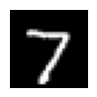

2
[2.43]


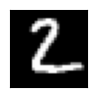

1
[1.73]


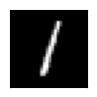

0
[1.03]


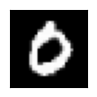

4
[4.68]


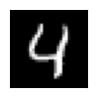

1
[1.88]


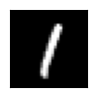

4
[6.96]


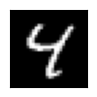

9
[6.37]


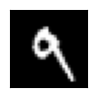

5
[3.29]


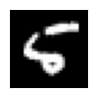

In [16]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(9):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [18]:
accuracy = np.average(np.round(y_pred[:, 0]) == y_test) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 22.720000000000002 %


In [19]:
np.min(y_pred)

np.float32(0.047829468)

# MLP with categorical output

In [20]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

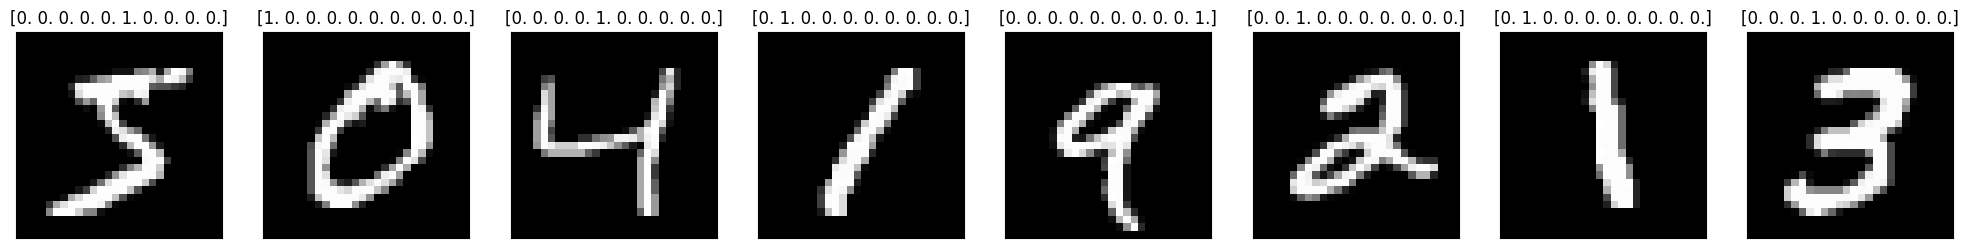

In [21]:
# show dataset
plt.figure(figsize=(25,4))
for i in range(8):
  plt.subplot(1,8,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y_train[i]))

In [22]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=5,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[ 0.02 -0.01 -0.04  0.07 -0.01 -0.01  0.02  1.04  0.03 -0.09]


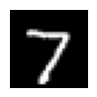

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[ 0.22 -0.08  0.73  0.15  0.03  0.01  0.08  0.03 -0.02 -0.04]


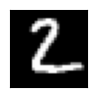

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.03  0.95 -0.02 -0.01  0.02 -0.    0.03  0.02 -0.04  0.  ]


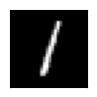

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.97  0.04 -0.02  0.07  0.02 -0.01  0.02  0.02 -0.05 -0.05]


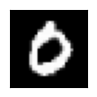

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[ 0.04  0.05  0.02  0.01  0.85 -0.02 -0.04  0.01  0.01  0.08]


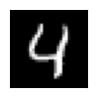

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.05  1.03 -0.07  0.03  0.02 -0.05 -0.04  0.04 -0.03  0.03]


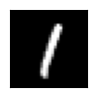

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[ 0.05  0.03 -0.   -0.04  0.89  0.07 -0.08  0.04  0.18 -0.07]


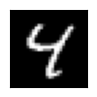

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[ 0.    0.05  0.12  0.1   0.2  -0.04 -0.08  0.   -0.05  0.71]


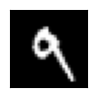

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[ 0.02  0.01  0.04  0.04  0.2   0.18  0.36 -0.13  0.11  0.23]


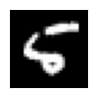

In [24]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(9):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [25]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 94.24 %


# Add sigmoid activation

In [26]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=4,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.97e-02 1.82e-03 1.32e-02 5.51e-02 4.21e-03 6.73e-03 5.14e-04 9.74e-01 4.22e-03 5.65e-02]


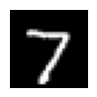

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[4.68e-02 2.91e-03 7.48e-01 9.06e-02 2.86e-04 2.47e-02 1.36e-01 1.17e-04 3.44e-02 2.43e-04]


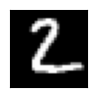

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.   0.9  0.04 0.03 0.02 0.03 0.04 0.08 0.02 0.02]


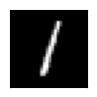

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.49e-01 2.34e-06 8.80e-03 3.35e-03 3.79e-04 2.33e-02 4.71e-02 3.29e-02 5.28e-03 4.37e-03]


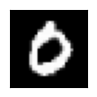

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.02 0.   0.03 0.   0.67 0.02 0.04 0.05 0.02 0.14]


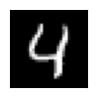

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.54e-04 9.27e-01 4.29e-02 5.50e-02 1.42e-02 1.96e-02 8.60e-03 1.03e-01 4.02e-02 3.64e-02]


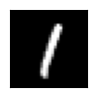

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0.   0.   0.   0.02 0.74 0.25 0.01 0.04 0.08 0.13]


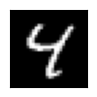

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.   0.02 0.01 0.02 0.24 0.08 0.04 0.02 0.05 0.52]


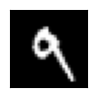

In [28]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [29]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 89.4 %


# Add softmax activation

In [30]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=4,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[9.40e-05 7.67e-07 3.74e-05 4.74e-04 8.63e-06 7.41e-05 1.87e-07 9.96e-01 2.35e-05 3.24e-03]


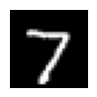

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.91e-03 7.13e-05 9.59e-01 1.12e-02 2.60e-07 2.22e-03 2.20e-02 1.25e-08 3.14e-03 1.67e-07]


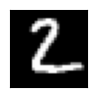

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.17e-05 9.54e-01 1.66e-02 5.45e-03 1.07e-03 3.10e-03 6.88e-03 5.40e-03 5.24e-03 2.62e-03]


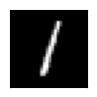

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.96e-01 1.35e-09 2.45e-04 5.70e-05 7.05e-07 3.04e-03 2.45e-04 1.04e-04 1.15e-04 2.61e-05]


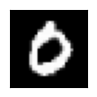

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.02e-03 4.44e-05 4.95e-03 1.51e-04 8.58e-01 4.25e-03 1.14e-02 1.09e-02 8.03e-03 1.01e-01]


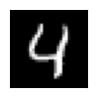

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.72e-06 9.74e-01 7.07e-03 4.88e-03 2.41e-04 6.27e-04 5.20e-04 4.73e-03 5.55e-03 2.16e-03]


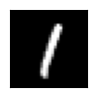

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.59e-05 5.77e-05 1.30e-05 4.24e-04 9.34e-01 2.78e-02 3.80e-04 1.51e-03 1.09e-02 2.46e-02]


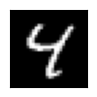

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[2.27e-05 4.34e-03 1.25e-03 3.59e-03 1.15e-01 1.38e-02 4.26e-03 5.70e-03 2.82e-02 8.24e-01]


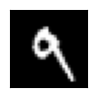

In [32]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [33]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 91.17 %


# Use cross entropy loss

In [34]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=4,
                    verbose=0,
                    shuffle=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[6.04e-05 1.32e-07 3.10e-05 5.68e-04 1.93e-06 2.28e-05 1.55e-08 9.98e-01 7.96e-06 1.16e-03]


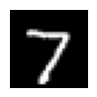

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.84e-03 9.45e-05 9.54e-01 1.30e-02 3.48e-08 5.00e-03 2.11e-02 6.97e-09 3.89e-03 2.91e-08]


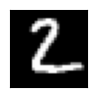

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.80e-05 9.72e-01 8.87e-03 4.10e-03 4.91e-04 2.43e-03 1.91e-03 6.06e-03 2.84e-03 8.47e-04]


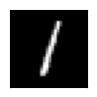

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.99e-01 2.17e-10 1.63e-04 2.95e-05 4.35e-07 8.01e-04 2.17e-04 8.48e-05 4.21e-05 2.80e-05]


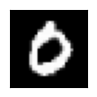

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.10e-03 1.35e-05 7.26e-03 2.63e-04 9.00e-01 2.53e-03 6.41e-03 1.50e-02 4.42e-03 6.33e-02]


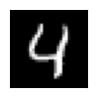

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.09e-06 9.80e-01 3.89e-03 4.04e-03 1.31e-04 4.55e-04 1.19e-04 6.51e-03 3.59e-03 9.19e-04]


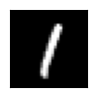

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.81e-05 1.99e-05 1.59e-05 4.37e-04 9.48e-01 2.27e-02 1.83e-04 2.10e-03 7.91e-03 1.84e-02]


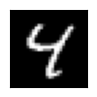

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.79e-05 5.13e-03 1.95e-03 6.22e-03 1.77e-01 2.42e-02 3.06e-03 7.53e-03 3.16e-02 7.43e-01]


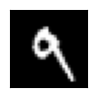

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[2.45e-03 7.72e-06 3.30e-03 2.38e-06 8.20e-02 1.64e-02 8.91e-01 4.69e-06 4.09e-03 4.71e-04]


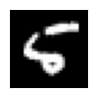

In [35]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(9):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [37]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 91.21000000000001 %


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[2.45e-03 7.72e-06 3.30e-03 2.38e-06 8.20e-02 1.64e-02 8.91e-01 4.69e-06 4.09e-03 4.71e-04]


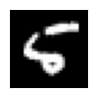

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4.90e-01 2.73e-07 9.31e-03 8.33e-06 3.04e-02 9.73e-02 3.67e-01 3.88e-05 5.54e-03 3.04e-04]


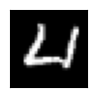

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1.44e-02 1.64e-02 4.11e-01 4.57e-01 1.11e-06 5.72e-02 9.76e-03 1.14e-04 3.38e-02 3.21e-05]


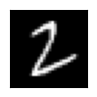

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.   0.   0.02 0.01 0.51 0.08 0.03 0.02 0.04 0.29]


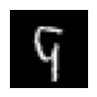

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4.08e-04 6.17e-03 5.14e-01 4.27e-01 1.24e-03 5.62e-03 2.77e-03 2.85e-04 4.06e-02 2.61e-03]


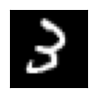

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.01 0.   0.46 0.04 0.05 0.01 0.33 0.08 0.01 0.  ]


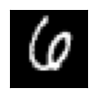

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.97e-05 4.50e-03 3.59e-03 1.94e-02 1.37e-04 4.35e-04 3.64e-06 5.01e-01 6.84e-02 4.02e-01]


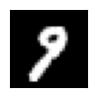

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0.   0.   0.17 0.   0.   0.01 0.   0.77 0.   0.03]


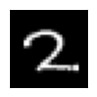

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[5.55e-03 1.40e-05 3.49e-04 4.87e-01 2.76e-03 4.94e-01 3.12e-03 8.40e-04 4.29e-03 1.83e-03]


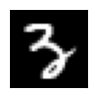

In [38]:
# show errors
idx = np.where(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]
for i in idx[:9]:
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [40]:
# plot confusion matrix
from sklearn import metrics

y_pred 
# = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Accuracy = {} %'.format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)


ValueError: operands could not be broadcast together with shapes (10000,10) (10000,) 

In [42]:
import os

# Define folder
folder = r"D:\Projects\AIMaster\Neural-Computing-and-Deep-Learning\MNIST_Project"

# Create it if missing
os.makedirs(folder, exist_ok=True)

# serialize model to JSON
model_json = model.to_json()
with open(os.path.join(folder, "model.json"), "w") as json_file:
    json_file.write(model_json)

# serialize weights to TensorFlow-native format
model.save(os.path.join(folder, "model.keras"))
print("Saved model to disk")

Saved model to disk


In [62]:
# load json and create model
json_file = open(os.path.join(folder, "model.json"), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(os.path.join(folder, "model.keras"))
print("Loaded model from disk")

Loaded model from disk
